!jt -t chesterish
# !jt -r

In [1]:
from genetic_algorithm import *
from numpy.random import default_rng


import binascii
%matplotlib notebook

import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation

import copy
from collections import Counter
import pandas as pd

In [2]:
## hexadecimal generator

nr_of_input = 2
nr_of_actions = 5
nr_of_inner = 3
nr_of_genes = 8
nr_individuals = 400

## world size
world_size = 40
world_size_x = world_size
world_size_y = world_size

## generations

0


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:50<00:00,  1.27s/it]


<IPython.core.display.Javascript object>


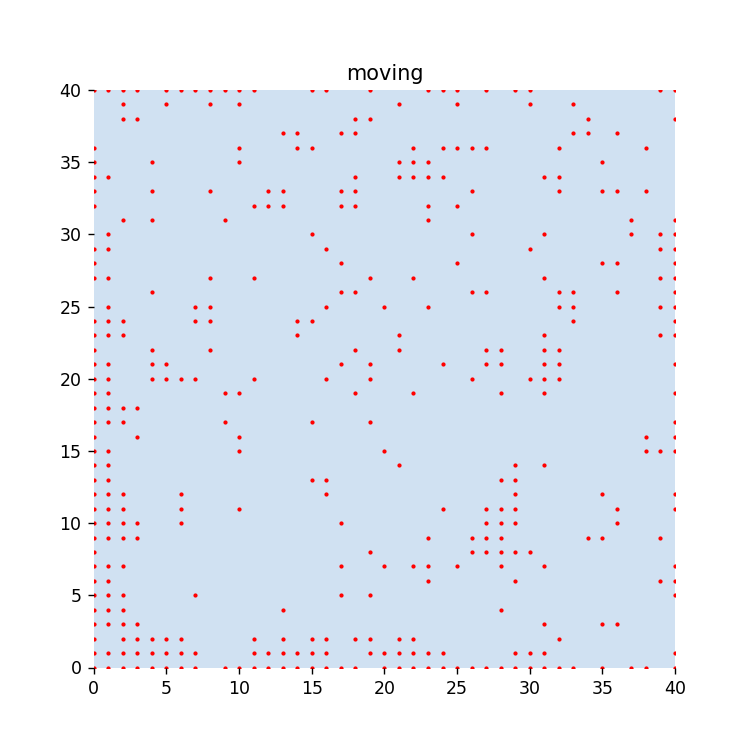

MovieWriter imagemagick unavailable; using Pillow instead.


1


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:45<00:00,  1.15s/it]


<IPython.core.display.Javascript object>


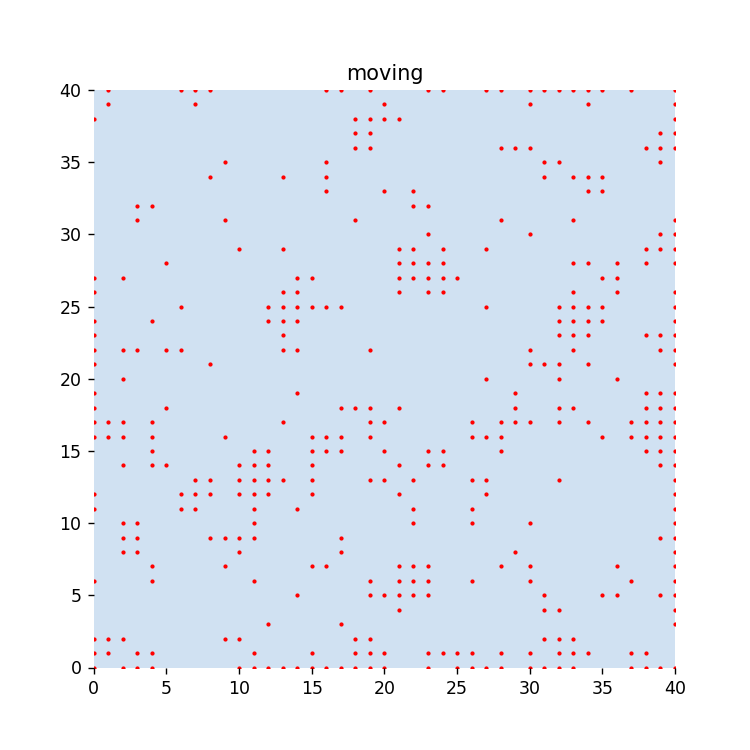

MovieWriter imagemagick unavailable; using Pillow instead.


2


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:48<00:00,  1.21s/it]


<IPython.core.display.Javascript object>


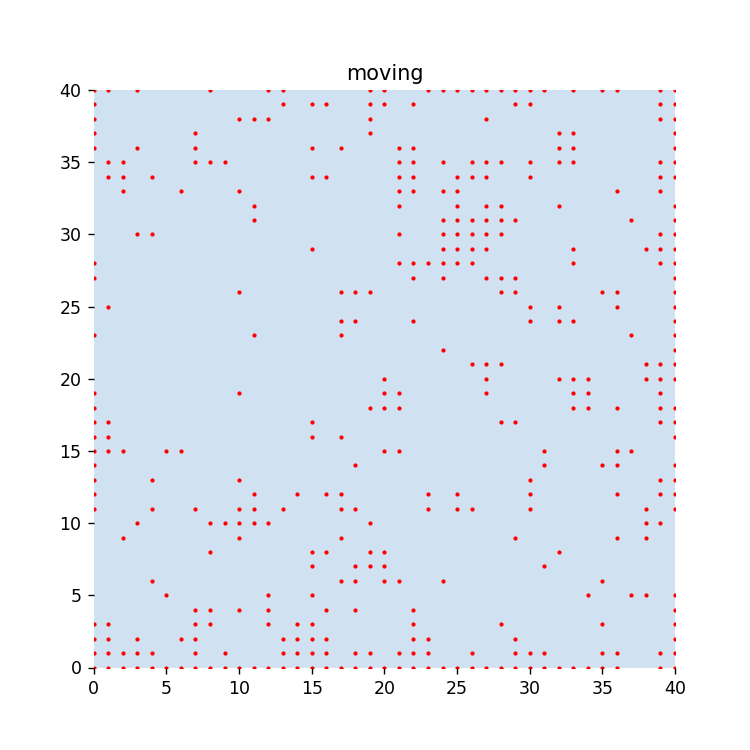

MovieWriter imagemagick unavailable; using Pillow instead.


3


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:59<00:00,  1.50s/it]


<IPython.core.display.Javascript object>


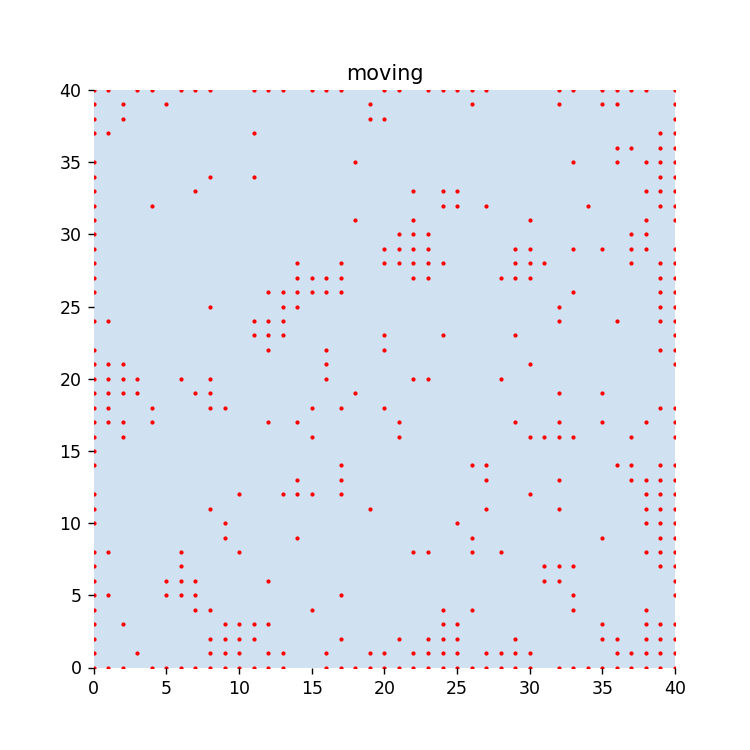

MovieWriter imagemagick unavailable; using Pillow instead.


4


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:46<00:00,  1.15s/it]


<IPython.core.display.Javascript object>


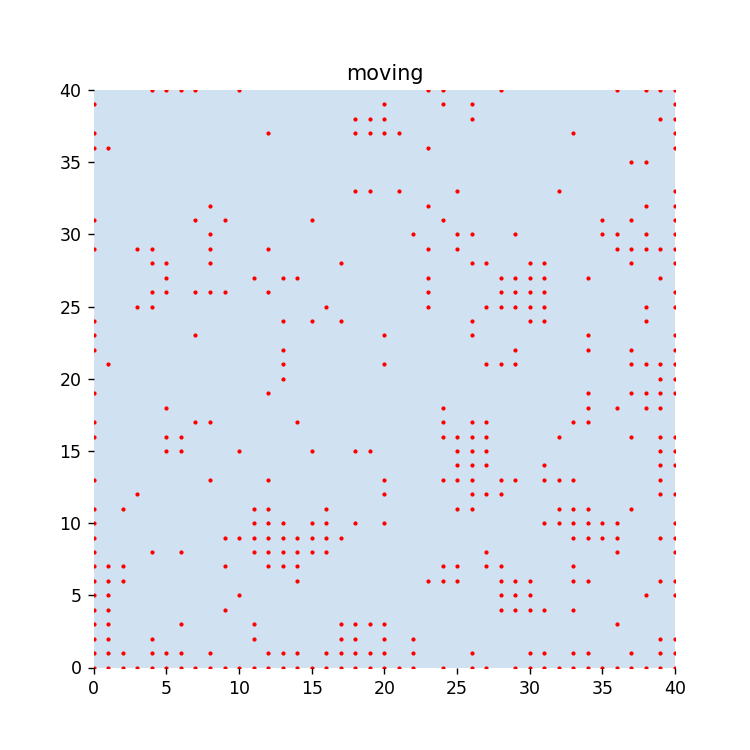

MovieWriter imagemagick unavailable; using Pillow instead.


5


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:41<00:00,  1.04s/it]


<IPython.core.display.Javascript object>


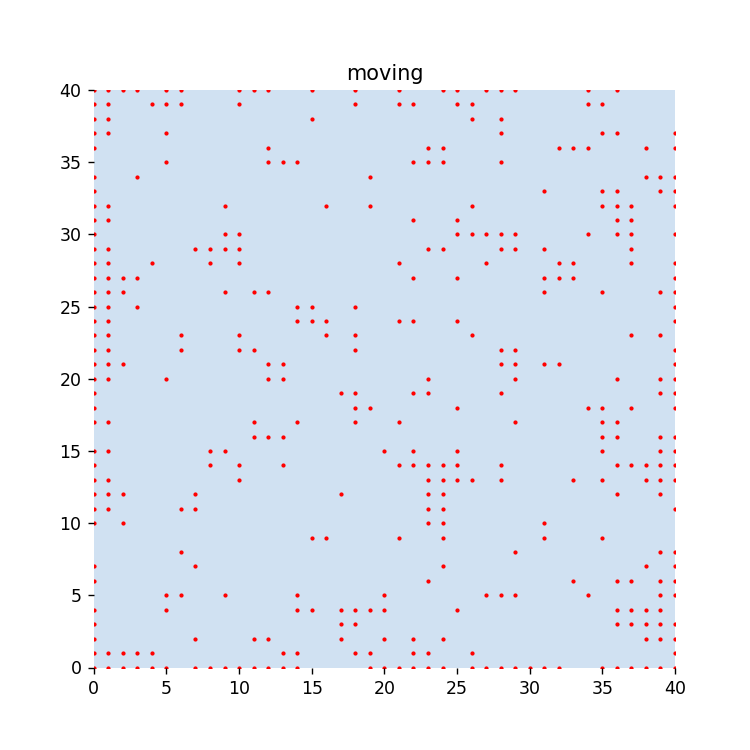

MovieWriter imagemagick unavailable; using Pillow instead.


6


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:47<00:00,  1.19s/it]


<IPython.core.display.Javascript object>


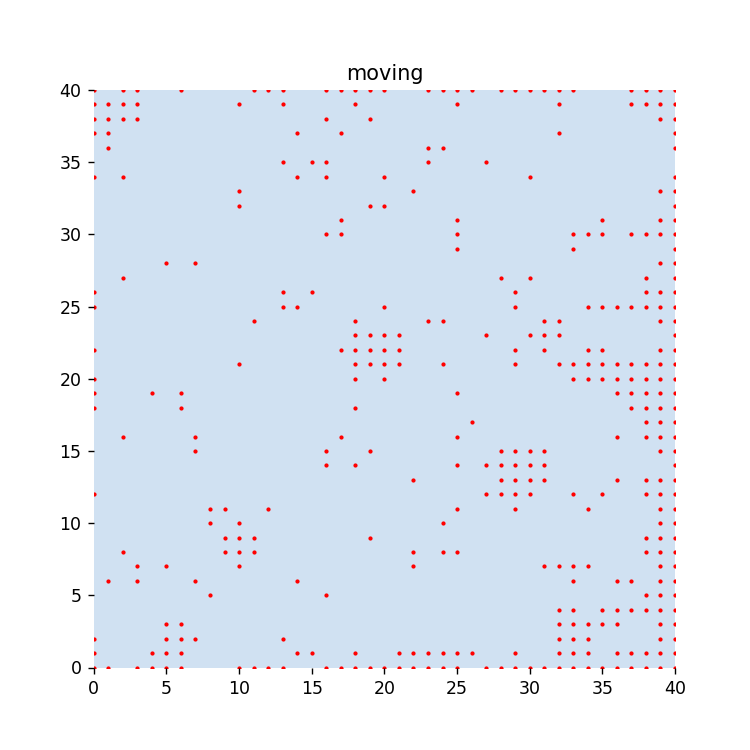

MovieWriter imagemagick unavailable; using Pillow instead.


7


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:52<00:00,  1.32s/it]


<IPython.core.display.Javascript object>


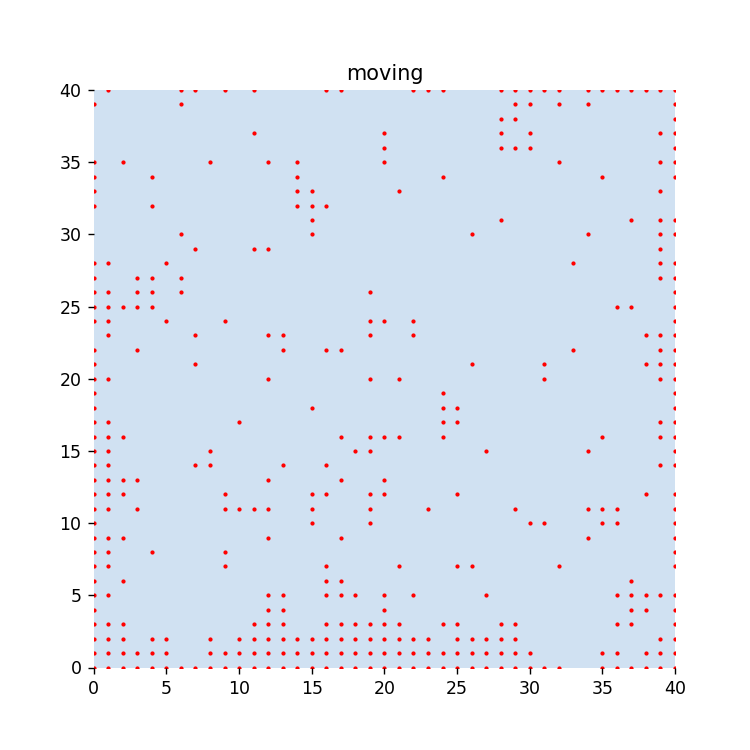

MovieWriter imagemagick unavailable; using Pillow instead.


8


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [01:08<00:00,  1.71s/it]


<IPython.core.display.Javascript object>


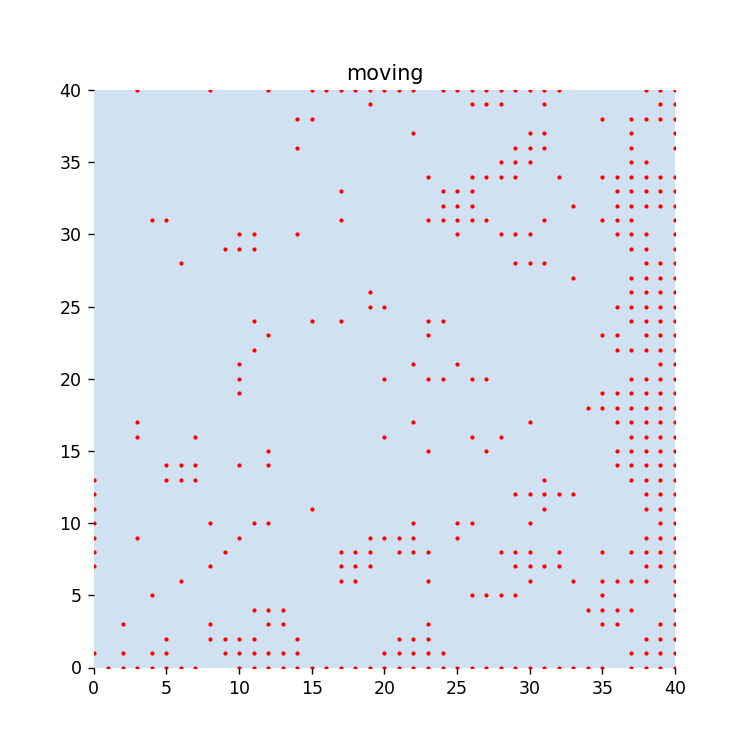

MovieWriter imagemagick unavailable; using Pillow instead.


9


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [01:05<00:00,  1.64s/it]


<IPython.core.display.Javascript object>

MovieWriter imagemagick unavailable; using Pillow instead.


10


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:53<00:00,  1.35s/it]


<IPython.core.display.Javascript object>

MovieWriter imagemagick unavailable; using Pillow instead.


11


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [01:03<00:00,  1.59s/it]


<IPython.core.display.Javascript object>

MovieWriter imagemagick unavailable; using Pillow instead.


12


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [01:14<00:00,  1.86s/it]


<IPython.core.display.Javascript object>

MovieWriter imagemagick unavailable; using Pillow instead.


13


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:34<00:00,  1.15it/s]


<IPython.core.display.Javascript object>

MovieWriter imagemagick unavailable; using Pillow instead.


14


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:59<00:00,  1.48s/it]


<IPython.core.display.Javascript object>

MovieWriter imagemagick unavailable; using Pillow instead.


15


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:53<00:00,  1.35s/it]


<IPython.core.display.Javascript object>

MovieWriter imagemagick unavailable; using Pillow instead.


16


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [01:09<00:00,  1.73s/it]


<IPython.core.display.Javascript object>

MovieWriter imagemagick unavailable; using Pillow instead.


17


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [01:32<00:00,  2.30s/it]


<IPython.core.display.Javascript object>

MovieWriter imagemagick unavailable; using Pillow instead.


18


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [01:02<00:00,  1.57s/it]


<IPython.core.display.Javascript object>


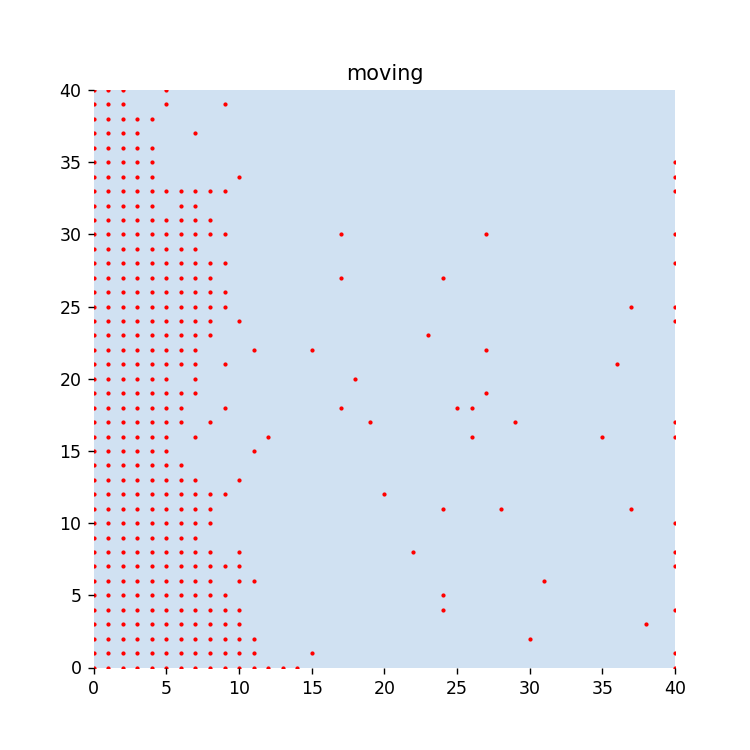

MovieWriter imagemagick unavailable; using Pillow instead.


19


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:22<00:00,  1.77it/s]


<IPython.core.display.Javascript object>


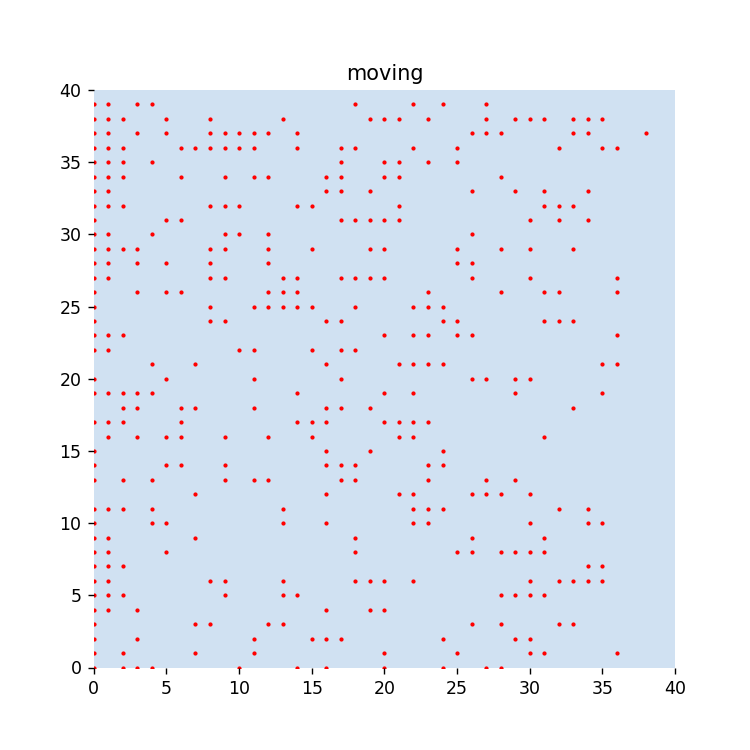

MovieWriter imagemagick unavailable; using Pillow instead.


20


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [01:37<00:00,  2.43s/it]
C:\Users\a831062\AppData\Local\Temp\ipykernel_3972\3421323080.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(6,6))


<IPython.core.display.Javascript object>


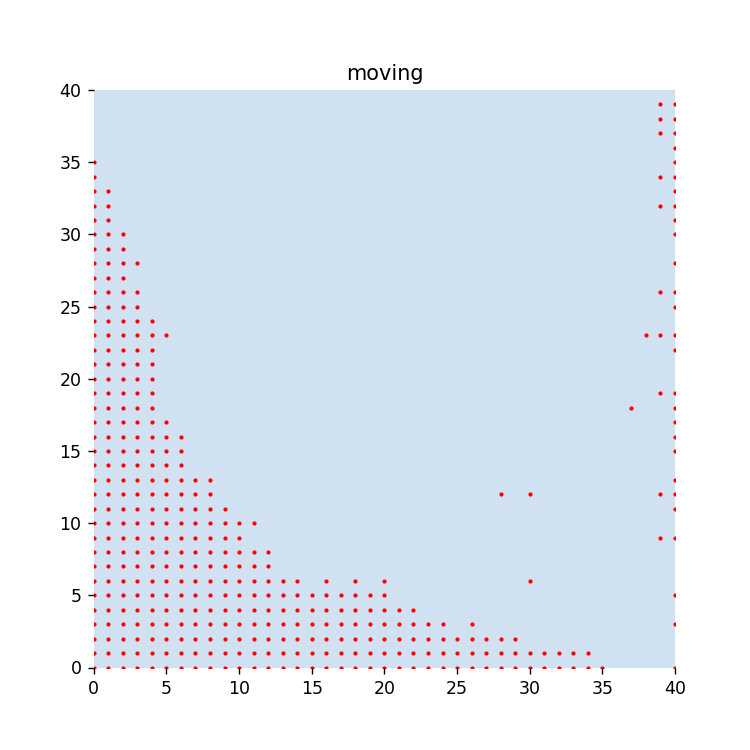

MovieWriter imagemagick unavailable; using Pillow instead.


21


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:39<00:00,  1.01it/s]


<IPython.core.display.Javascript object>


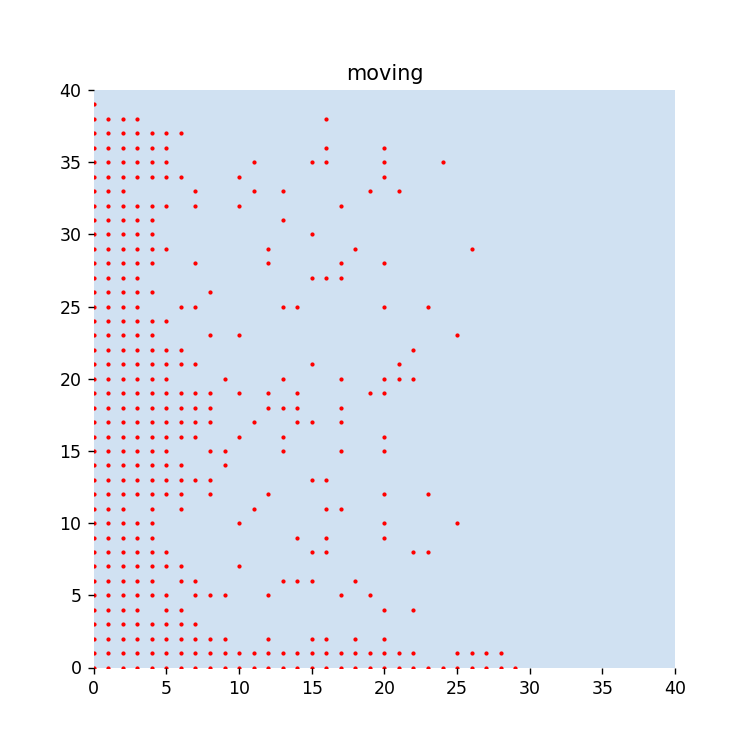

MovieWriter imagemagick unavailable; using Pillow instead.


22


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:12<00:00,  3.13it/s]


<IPython.core.display.Javascript object>

MovieWriter imagemagick unavailable; using Pillow instead.


23


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [01:31<00:00,  2.28s/it]


<IPython.core.display.Javascript object>

MovieWriter imagemagick unavailable; using Pillow instead.


24


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [01:10<00:00,  1.75s/it]


<IPython.core.display.Javascript object>

MovieWriter imagemagick unavailable; using Pillow instead.


25


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:53<00:00,  1.34s/it]


<IPython.core.display.Javascript object>

MovieWriter imagemagick unavailable; using Pillow instead.


26


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [01:49<00:00,  2.75s/it]


<IPython.core.display.Javascript object>

MovieWriter imagemagick unavailable; using Pillow instead.


27


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [01:23<00:00,  2.10s/it]


<IPython.core.display.Javascript object>

MovieWriter imagemagick unavailable; using Pillow instead.


28


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [01:46<00:00,  2.66s/it]


<IPython.core.display.Javascript object>


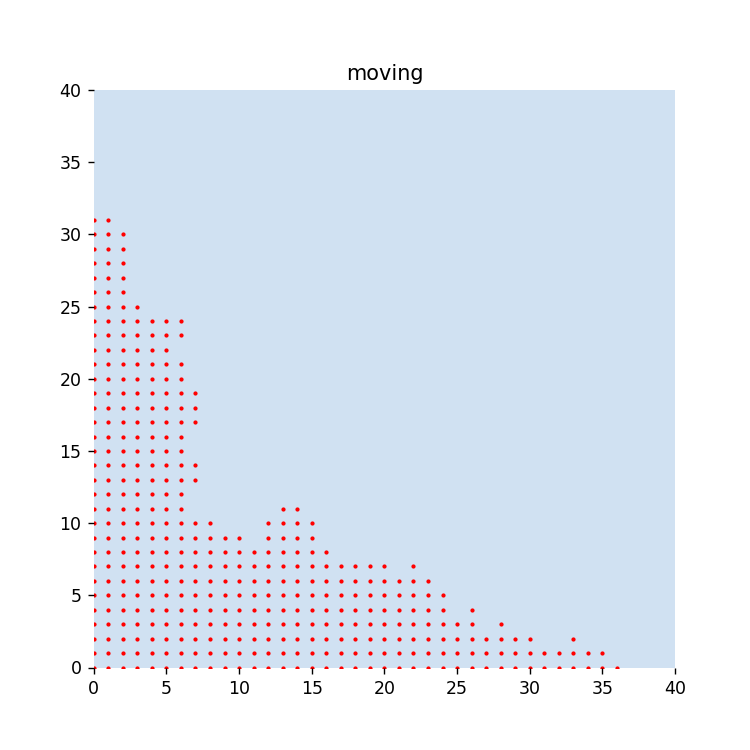

MovieWriter imagemagick unavailable; using Pillow instead.


29


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:05<00:00,  7.77it/s]


<IPython.core.display.Javascript object>


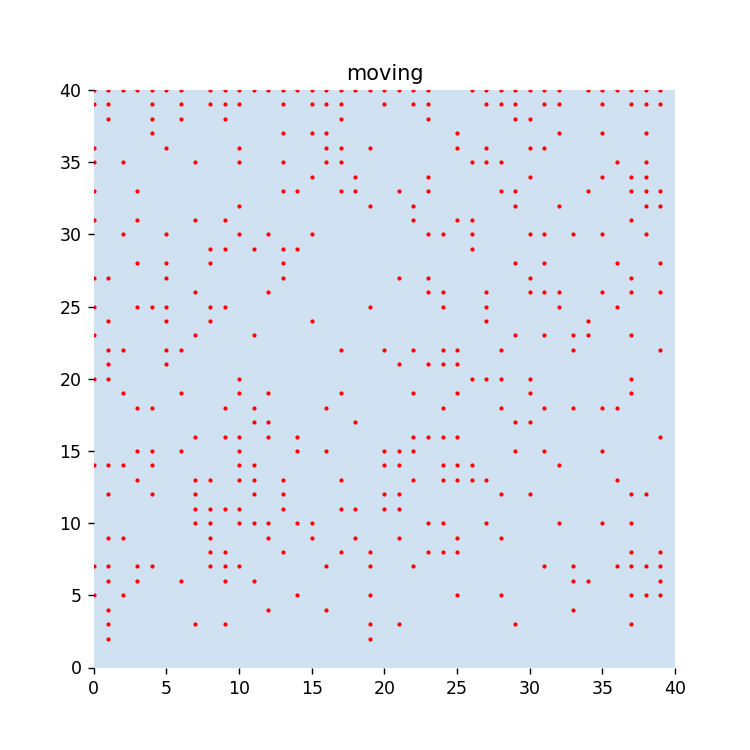

MovieWriter imagemagick unavailable; using Pillow instead.


30


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [01:01<00:00,  1.55s/it]


<IPython.core.display.Javascript object>


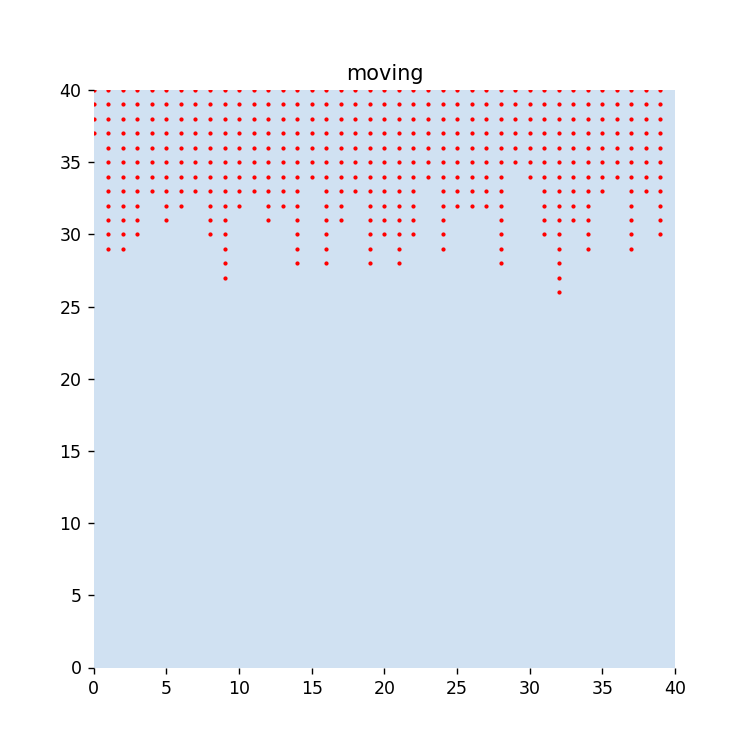

MovieWriter imagemagick unavailable; using Pillow instead.


31


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [01:03<00:00,  1.59s/it]


<IPython.core.display.Javascript object>


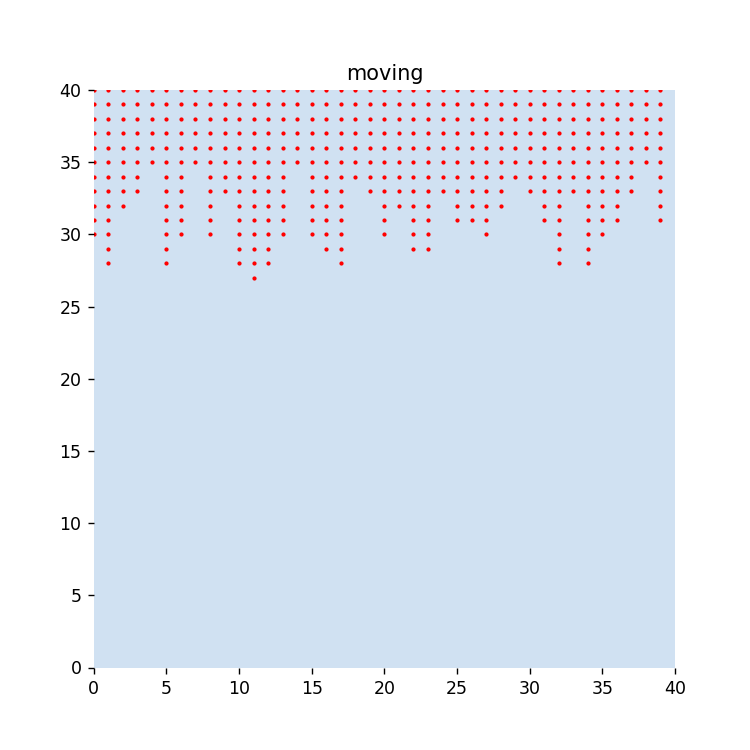

MovieWriter imagemagick unavailable; using Pillow instead.


32


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:03<00:00, 10.77it/s]


<IPython.core.display.Javascript object>


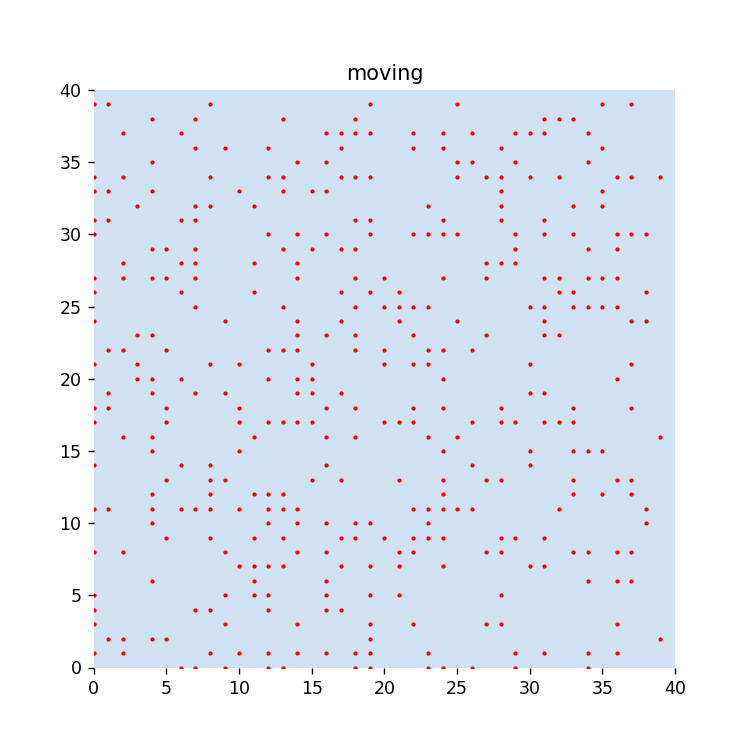

MovieWriter imagemagick unavailable; using Pillow instead.


33


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:06<00:00,  6.62it/s]


<IPython.core.display.Javascript object>


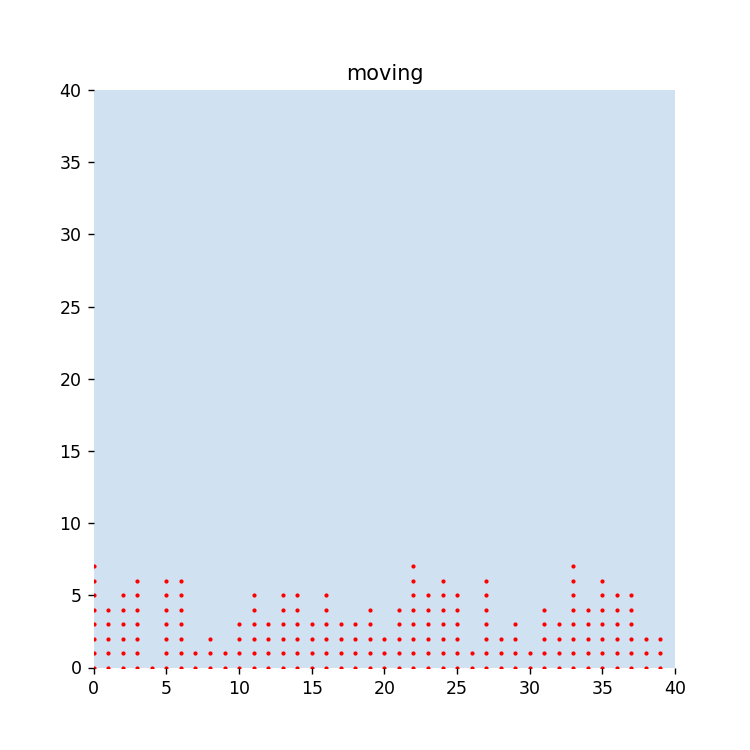

MovieWriter imagemagick unavailable; using Pillow instead.


34


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [01:30<00:00,  2.26s/it]


<IPython.core.display.Javascript object>


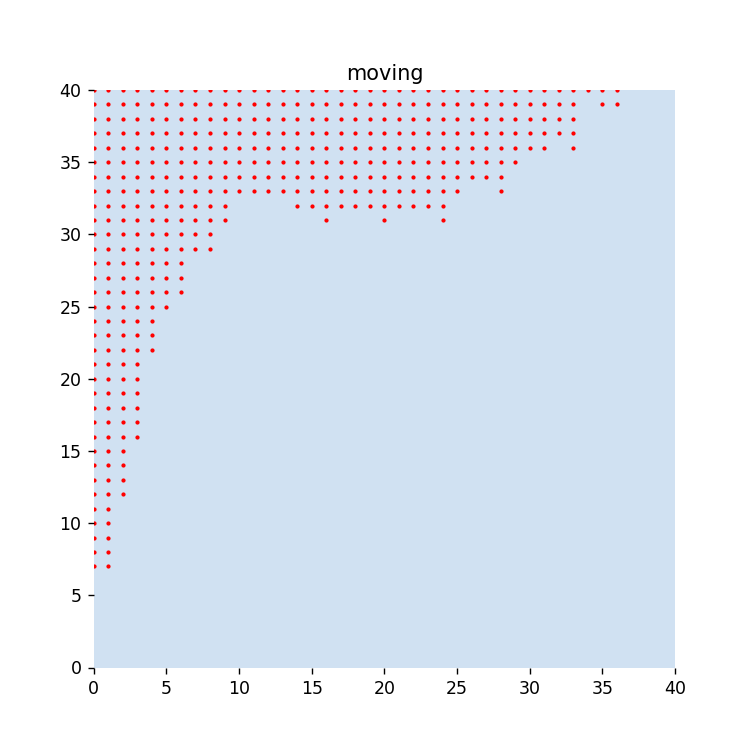

MovieWriter imagemagick unavailable; using Pillow instead.


35


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [01:43<00:00,  2.59s/it]


<IPython.core.display.Javascript object>

MovieWriter imagemagick unavailable; using Pillow instead.


36


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 26.54it/s]


<IPython.core.display.Javascript object>

MovieWriter imagemagick unavailable; using Pillow instead.


37


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:06<00:00,  6.49it/s]


<IPython.core.display.Javascript object>

MovieWriter imagemagick unavailable; using Pillow instead.


38


 12%|██████████▍                                                                        | 5/40 [00:01<00:11,  2.95it/s]

KeyboardInterrupt: 

In [3]:
result = {}
for gen_nr in range(100):
    print(gen_nr)
    if gen_nr == 0:
        result = initial_population(nr_individuals, nr_of_genes, nr_of_input, nr_of_actions, nr_of_inner, world_size)
        result = steps_in_generation(world_size, result, world_size_x, world_size_y)
#         print(result[0])
    else:
        
        result = asexual_reproduction_and_mutation(world_size, result, nr_individuals)
        
        result = next_generation(result,nr_of_input, nr_of_actions, nr_of_inner, world_size, nr_individuals)
#         print(result[0])
        result = steps_in_generation(world_size, result, world_size_x, world_size_y)
        
    coords = generate_dictionary_of_coords(result, world_size+1)
    
    result.update(result)
    def update(i):
        ax.clear()
        ax.set_facecolor(plt.cm.Blues(.2))

        ax.set_xlim([0,world_size_x])
        ax.set_ylim([0,world_size_y])
        ax.set_title('moving')
        ax.scatter(x=coords[i]['x'],y=coords[i]['y'], c='red', s=2, marker='o')
        [spine.set_visible(False) for spine in ax.spines.values()]


    fig, ax = plt.subplots(figsize=(6,6))
    myAnimation = FuncAnimation(
        fig = fig,
        func = update,
        frames = len(coords),
        interval = 10, repeat=False
    )
    myAnimation.save(f'generation-{gen_nr}.gif', writer='imagemagick' , fps=10)